<a href="https://colab.research.google.com/github/MALISMF/Computing-Systems-and-Computer-Networks/blob/main/Task11.%20Theory%20of%206%20handshakes/6handshake.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Загружаем граф

In [4]:
import networkx as nx

G = nx.read_edgelist('facebook_combined.txt')

print(f"Кол-во нод: {G.number_of_nodes()}")
print(f"Кол-во ребер: {G.number_of_edges()}")

Кол-во нод: 4039
Кол-во ребер: 88234


## Отображаем граф

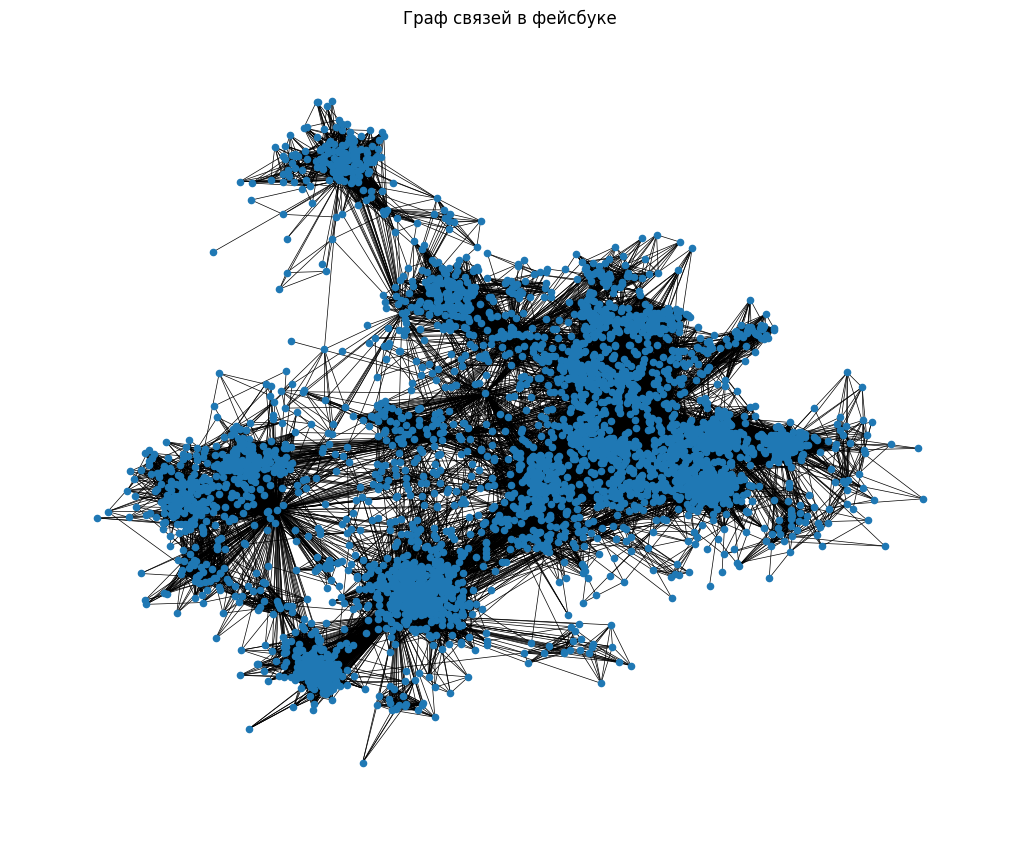

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
nx.draw(G, with_labels=False, node_size=20, width=0.5)
plt.title("Граф связей в фейсбуке")
plt.show()

## Считаем кратчайшие пути между всеми парами

In [6]:
shortest_paths = dict(nx.all_pairs_shortest_path_length(G))

## Распределяем кратчайшие пути

In [7]:
import collections

path_length_counts = collections.defaultdict(int)

for source_node, targets in shortest_paths.items():
    for target_node, length in targets.items():
        if source_node != target_node:
            path_length_counts[length] += 1

print("Количество пар вершин для каждой длины кратчайшего пути:")
for length, count in sorted(path_length_counts.items()):
    print(f"  Длина пути {length}: {count} пар")

Количество пар вершин для каждой длины кратчайшего пути:
  Длина пути 1: 176468 пар
  Длина пути 2: 2716134 пар
  Длина пути 3: 3981852 пар
  Длина пути 4: 5861560 пар
  Длина пути 5: 2565170 пар
  Длина пути 6: 677214 пар
  Длина пути 7: 315464 пар
  Длина пути 8: 15620 пар


## Отображаем гистограмму, моду и медиану

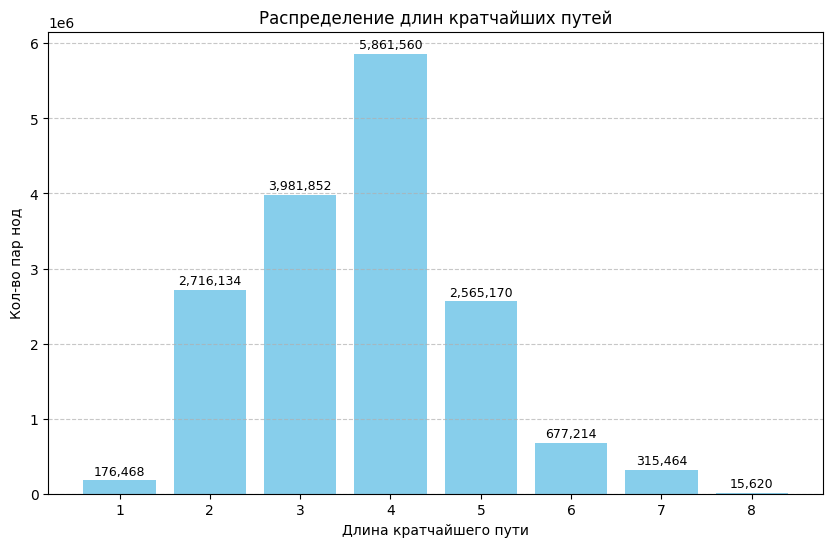


Мода (наиболее частая длина пути): 4 (с 5861560 парами)
Медиана длин путей: 4.0


In [8]:
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

lengths = list(path_length_counts.keys())
counts = list(path_length_counts.values())

plt.figure(figsize=(10, 6))
bar_container = plt.bar(lengths, counts, color='skyblue')
plt.xlabel('Длина кратчайшего пути')
plt.ylabel('Кол-во пар нод')
plt.title('Распределение длин кратчайших путей')
plt.xticks(lengths)
plt.grid(axis='y', linestyle='--', alpha=0.7)


for bar in bar_container:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.005 * max(counts), f'{yval:,}', ha='center', va='bottom', fontsize=9)


plt.show()


if path_length_counts:
    mode_length = max(path_length_counts, key=path_length_counts.get)
    mode_count = path_length_counts[mode_length]
    print(f"\nМода (наиболее частая длина пути): {mode_length} (с {mode_count} парами)")

all_path_lengths = []
for length, count in path_length_counts.items():
    all_path_lengths.extend([length] * count)

if all_path_lengths:
    median_length = np.median(all_path_lengths)
    print(f"Медиана длин путей: {median_length}")